<a href="https://colab.research.google.com/github/Amitkundu22/Airbnb-Booking-Analysis/blob/main/Airbnb_booking_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [47]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

In [ ]:
#Mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Reading csv file 
file_path ='/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv'
df=pd.read_csv(file_path)

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#Checking missing, duplicate and unique values in dataset


In [7]:
#checking the missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

###There are almost 10 thousand reviews are missing.

### Also few name and hostname are missing.



In [8]:
#Checking duplicate values
df.duplicated().sum()

0

###As we can see we don't have any duplicate values in our dataset

In [9]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

### From here we got 5 neighbourhood_group(number of location)

### Also 3 types of room are available 

#Managing Missing Values

In [10]:
# dropping the unnecessary columns
df.drop(['id','name','last_review'],axis=1,inplace = True)

In [11]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [12]:
df.shape

(48895, 13)

In [13]:
#Replacing all the null value of reviews_per_month by'0'
#Replacing all the null values of host_name by 'No_Name'
df.reviews_per_month.fillna(0, inplace= True)
df.host_name.fillna('No_Name',inplace=True)

df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [14]:
# Rechecking null values after replacing the null values
df.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   host_name                       48895 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

#We have encountered all the data and cleaned it by successfully dropping all the null values

#Now let's do some Exploratry Data Analysis(EDA)

###Analytical information about price

In [16]:
#Description of price
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [17]:
# finding property price with 0 values
df.price[df.price<=0].count()

11

### In any situation any property price cannot be 0. Hence we eliminate/drop the data with 0 price.

In [18]:
# dropping all the zero price in dataset
df.drop(df.price[df.price<=0].index,axis=0,inplace=True)

In [19]:
df.price[df.price<=0].count()

0

####here we have dropped all the zero price from the dataset

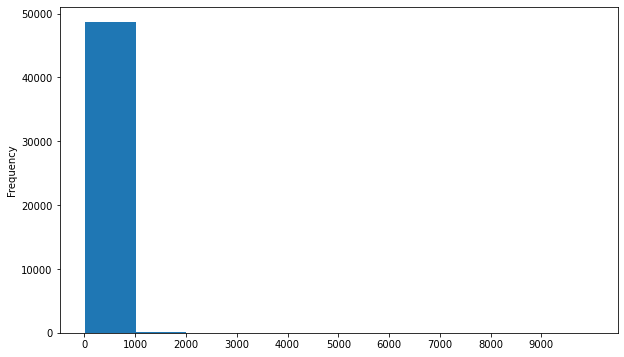

In [20]:
#Price plotting 
plt.figure(figsize=(10,6))
df['price'].plot(kind='hist')
plt.xticks(np.arange(0, 10000, 1000))
plt.show()

**from this plot we can see that most of the room tariffs/rent are within 1000**

In [21]:
#Fetching the price greater then 1000
df.price[df.price > 1000].count()

239

### In this dataset, we have total 239 datapoints with the price greater then 1000



#**Learnings from Areas and Hosts**

##**Number of host distribution in different Neighborhood groups**

In [22]:
# number of hosts per neighbourhood_group
host_per_neighbourhood_group= df.groupby(['neighbourhood_group']).size().reset_index(name='hosts')
host_per_neighbourhood_group

,neighbourhood_group,hosts
0,Bronx,1090
1,Brooklyn,20095
2,Manhattan,21660
3,Queens,5666
4,Staten Island,373


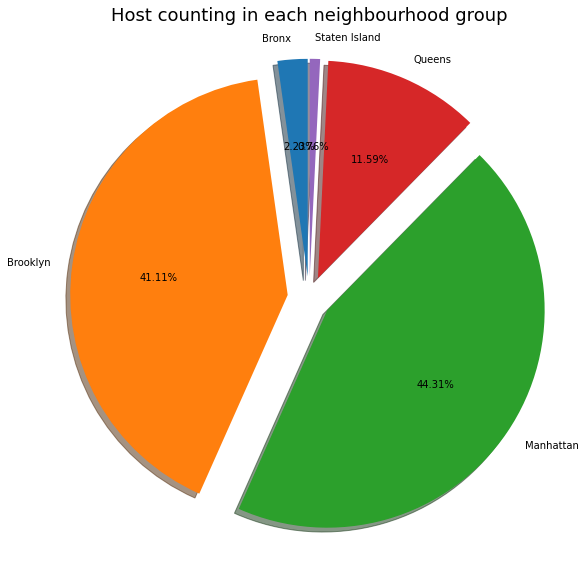

In [24]:
# plotting the number of hosts per neighbourhood_group
plt.pie(host_per_neighbourhood_group['hosts'],
labels=host_per_neighbourhood_group['neighbourhood_group'], 
autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1,0.1],shadow = True)
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Host counting in each neighbourhood group', {'fontsize': 18})
plt.show()

**###From this plot we can see that most numbers of hosts belongs to Manhattan (44.31%) and least numbers of hosts belongs to Staten Island(0.76%)**

#**room types preferred by the customers**

In [25]:
#Counting the value of room type preferred by customers
df['room_type'].value_counts()

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64

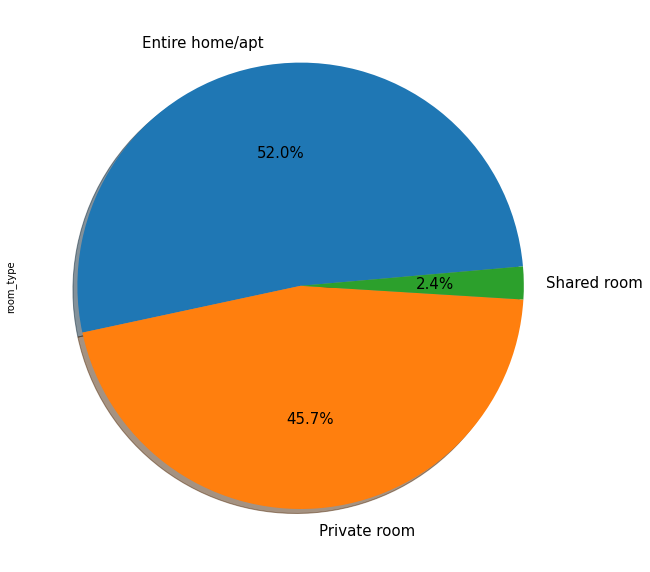

In [26]:
#Ploting the value of room type preferred by customers
plt.figure(figsize=(10,12))
df['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=5,shadow = True, fontsize =15)

**This graph describes that customers are prefer living in Apartment or private rooms more then shared rooms**

#**plot arrangement of room types in verious neighbourhood groups**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


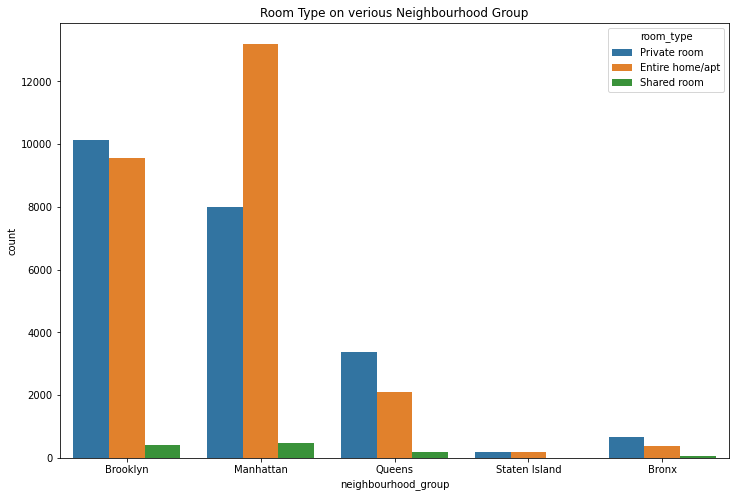

In [27]:
plt.figure(figsize=(12,8))
plt.title("Room Type on verious Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type)
plt.show()

**.From this chart we experianced that Manhattan and Brooklyn are the most visited location where as Staten Island is the least visited one.**

**.Majority hosts in the Manhatan and Brooklyn provide either a Private room or Entire home/apt.**

#**Average night spent by people in each room type**

In [28]:
df.groupby(['neighbourhood_group'])['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,4.563303,15.638775,1.0,1.0,2.0,3.0,365.0
Brooklyn,20095.0,6.055486,17.634895,1.0,2.0,3.0,5.0,999.0
Manhattan,21660.0,8.579409,24.051383,1.0,1.0,3.0,6.0,1250.0
Queens,5666.0,5.181433,15.028725,1.0,1.0,2.0,3.0,500.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


In [29]:
df.groupby(['room_type','neighbourhood_group'])['minimum_nights'].mean().unstack()

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,5.957784,6.531492,10.539855,5.369752,6.238636
Private room,3.861751,5.541675,5.446880,5.120107,3.632979
Shared room,3.366667,7.644769,6.766667,4.232323,2.333333


Text(0, 0.5, 'Avarage_minimum_nights')

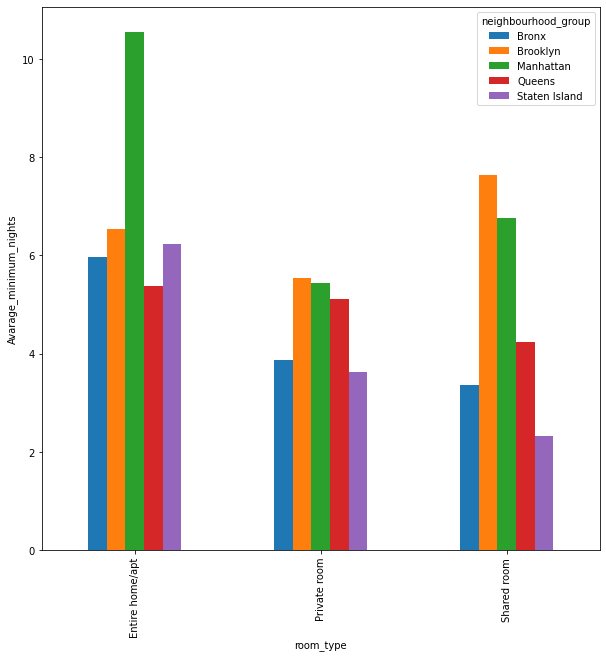

In [30]:
# plotting the avarage minimum nights
df.groupby(['room_type','neighbourhood_group'])['minimum_nights'].mean().unstack().plot.bar()
plt.ylabel('Avarage_minimum_nights')


**It appears that Manhattan customer has spent more number of night in entire apartment compare to other room types while Queens has almost same average night spendings by customers in private and entire apartment .**



##**1.What can we learn about different hosts and areas?**

In [31]:
# grouping the data 
host_per_area = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
# sorting the value
host_per_area.sort_values(by='calculated_host_listings_count', ascending=False).head(10)


,host_name,neighbourhood_group,calculated_host_listings_count
13219,Sonder (NYC),Manhattan,327
1832,Blueground,Brooklyn,232
1833,Blueground,Manhattan,232
7274,Kara,Manhattan,121
7479,Kazuya,Queens,103
7478,Kazuya,Manhattan,103
7477,Kazuya,Brooklyn,103
6539,Jeremy & Laura,Manhattan,96
13218,Sonder,Manhattan,96
2900,Corporate Housing,Manhattan,91


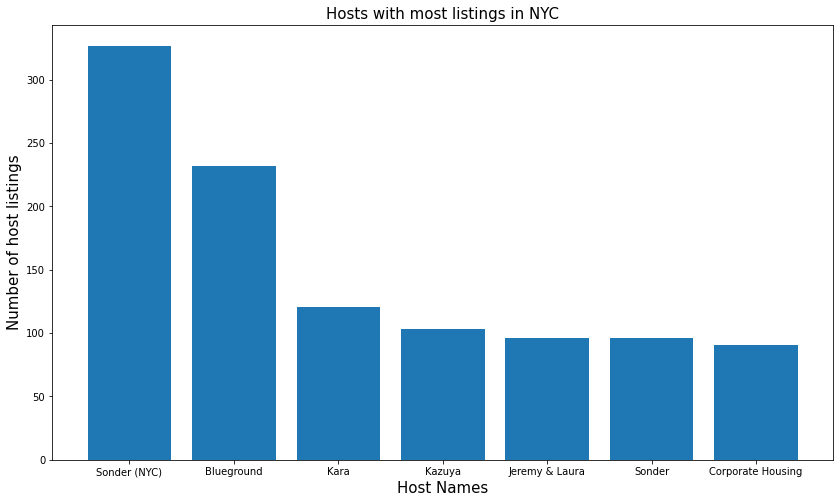

In [32]:
# Visualizing the hosts with most listings.
# selecting top 10 host 
host_per_area=host_per_area.sort_values(by='calculated_host_listings_count', ascending=False).head(10)

plt.rcParams['figure.figsize'] = (14,8)
host_per_area['host_name']
host_per_area['calculated_host_listings_count']
plt.bar(host_per_area['host_name'],host_per_area['calculated_host_listings_count'])

plt.title('Hosts with most listings in NYC',{'fontsize':15})
plt.xlabel('Host Names',{'fontsize':15})
plt.ylabel('Number of host listings',{'fontsize':15})
plt.show()

**We can infer from the above result that Sonder(NYC), with 327 listings in Manhattan, is the host with the most listings.**

###**Analysing the revenue in neighbourhood_group**

In [33]:
#Fetching out the total cost
df['total_cost'] = df['price'] * df['minimum_nights']
df.groupby(['host_id']).sum('total_cost').sort_values(by='total_cost',ascending=False).head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,total_cost
host_id,,,,,,,,,
107434423,9451.60418,-17166.13165,70331,7470,29,6.04,53824,58884,2258580
271248669,40.71206,-74.00999,6500,180,0,0.00,1,365,1170000
30283594,4931.41347,-8952.50779,33581,3767,65,3.94,14641,37924,1164243
20582832,40.76810,-73.91651,10000,100,2,0.04,1,0,1000000
3906464,40.71355,-73.98507,9999,99,6,0.14,1,83,989901


In [34]:
#Which neighbourhood_group will profit the most

df[['neighbourhood_group','total_cost']].groupby(['neighbourhood_group']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(5)


,total_cost
neighbourhood_group,
Manhattan,40941029
Brooklyn,16222407
Queens,5061550
Bronx,378404
Staten Island,198950


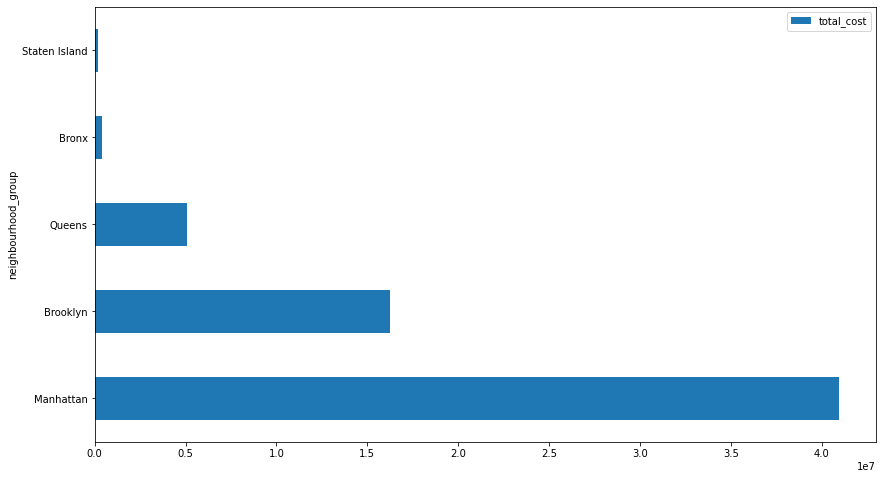

In [35]:
#visualizing the neighbourhood_group with most profit
df[['neighbourhood_group','total_cost']].groupby(['neighbourhood_group']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head().plot(kind = 'barh')


**Manhattan generates the maximum revenue among neighbourhood_group**

---



###**Analysing the revenue in neighbourhood**

In [36]:
#which neighbourhood will profit the most
df[['neighbourhood','total_cost']].groupby(['neighbourhood']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(10)

,total_cost
neighbourhood,
Midtown,4797807
Upper West Side,4469070
Williamsburg,3926160
Hell's Kitchen,3757457
Upper East Side,2914718
East Village,2643097
Chelsea,2517264
Bedford-Stuyvesant,2468039
Harlem,2186254


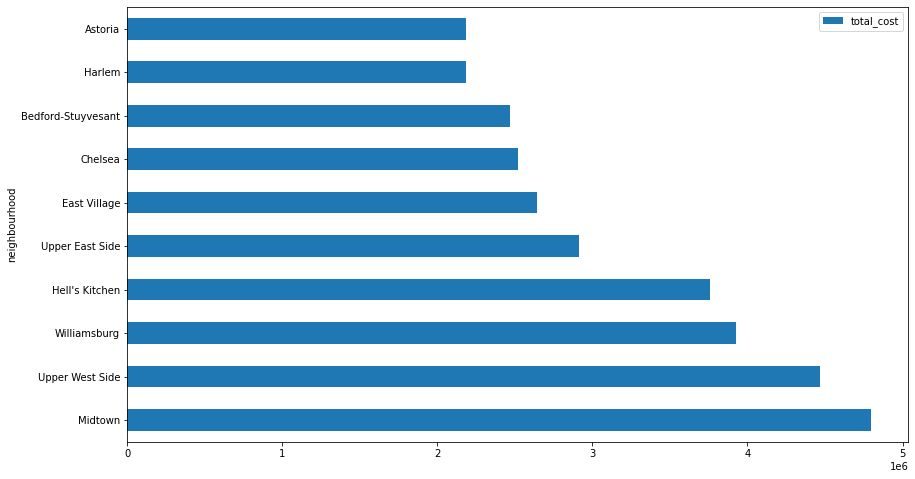

In [37]:
#Ploting the neighbourhood profit
df[['neighbourhood','total_cost']].groupby(['neighbourhood']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(10).plot(kind='barh')
plt.rcParams['figure.figsize']=(10,10)

**The neighbourhood that generates the maximum revenue is Midtown, which is also the most costly.**

#**2.What can we learn from predictions? (ex: locations, prices, reviews, etc)**

###**number of reviews in each neighbourhood group**

In [38]:
# Establishing a Report about The  number of reviews in the neighbourhood_group.
areas_review = df.groupby(['neighbourhood_group'])['number_of_reviews'].max()
areas_review=areas_review.reset_index()
print(areas_review)

  neighbourhood_group  number_of_reviews
0               Bronx                321
1            Brooklyn                488
2           Manhattan                607
3              Queens                629
4       Staten Island                333


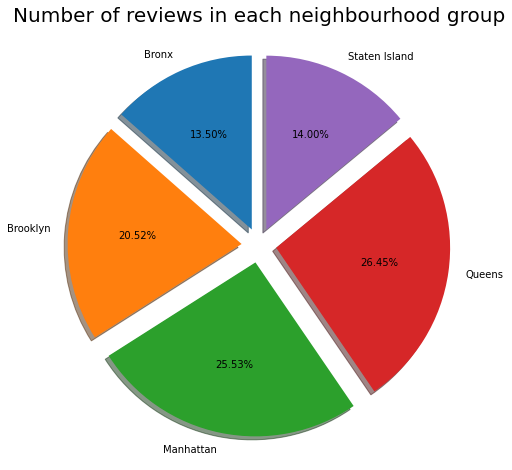

In [39]:
# Visualising the number of reviews in each neighbourhood group
plt.rcParams['figure.figsize'] = (12,8)
reviews = areas_review['number_of_reviews']
plt.pie(reviews, labels = areas_review['neighbourhood_group'], autopct ='%0.2f%%', startangle =90,explode = [0.1,0.1,0.1,0.1,0.1], shadow = True)
plt.title('Number of reviews in each neighbourhood group', {'fontsize': 20})
plt.show()

**We can see that the bulk of evaluations are for Queens, Manhattan, which suggests that people like living in this area.**

In [40]:
# Report on number of Reviews vs Price
area_price = df.groupby(['price'])['number_of_reviews'].max().reset_index()
area_price

,price,number_of_reviews
0,10,93
1,11,113
2,12,8
3,13,9
4,15,19
...,...,...
668,7703,0
669,8000,1
670,8500,2
671,9999,6


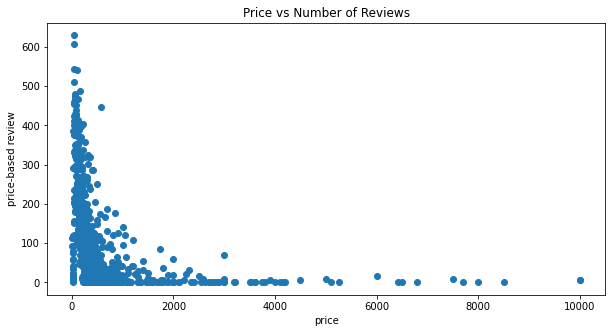

In [41]:
price = area_price['price']
Review = area_price['number_of_reviews']
fig = plt.figure(figsize = (10, 5))
 
# creating the scatter plot
plt.scatter(price, Review)

plt.xlabel("price")
plt.ylabel("price-based review")
plt.title("Price vs Number of Reviews")
plt.show()

**Data analysis has revealed that consumers prefer reduced prices.**

#**3.Which hosts are the busiest and why?**

**Let's attempt to comprehend which of the hosts are busiest and why that is the case.**

In [42]:
busiest_hosts = df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10278,Dona,47621202,Private room,629
17707,Jj,4734398,Private room,607
25565,Maya,37312959,Private room,543
6234,Carol,2369681,Private room,540
8946,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37764,Wanda,792159,Private room,480
22498,Linda,2680820,Private room,474
8624,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


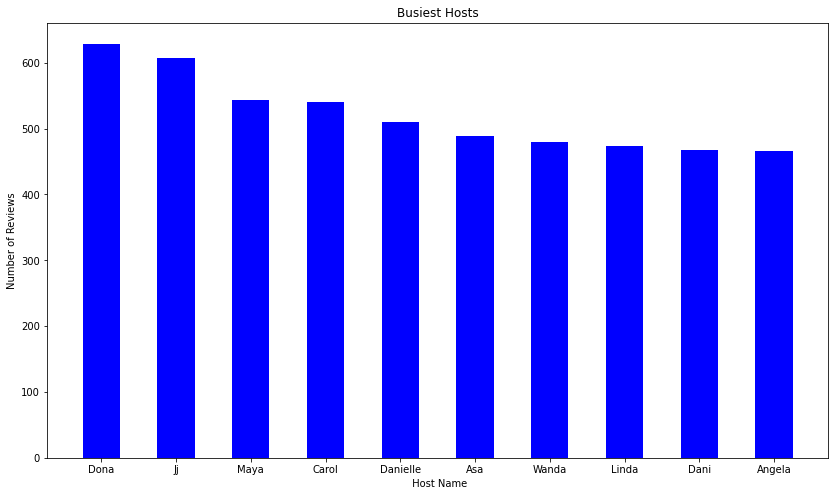

In [43]:
# Anlysing the data by vizualisation
busiest_hosts['host_name']
busiest_hosts['number_of_reviews']
fig = plt.figure(figsize = (14, 8))
# creating the bar plot
plt.bar(busiest_hosts['host_name'], busiest_hosts['number_of_reviews'], color ='blue',width = 0.5)
plt.xlabel(" Host Name")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

**From above analysis we saw that Dona, Jj, Maya,Carol, Danielle are the busiest hosts.**


**We previously knew that most hosts in Manhattan and Brooklyn offered the most popular room types; the barplot above illustrates the relationship between the number of reviews and the yearly availability of these rooms.**

**As a result, Manhattan and Brooklyn neighbourhood groups receive the most reviews, making hosts from these locations the busy of all.**

#**4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

###**Analysing the traffic among area**

Text(0.5, 1.0, 'Density of hotels')

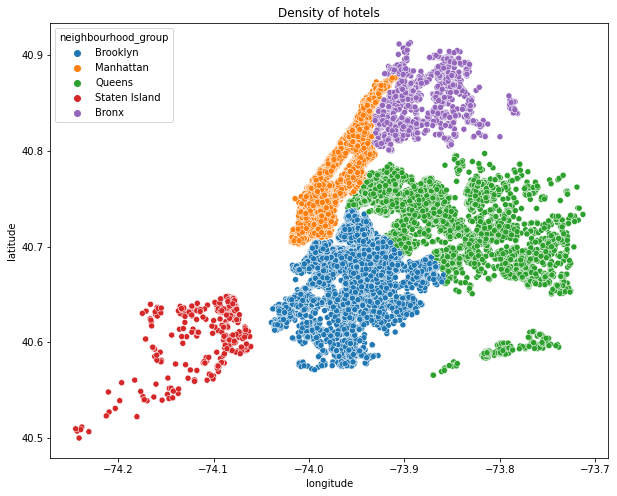

In [44]:
# Finding the difference of traffic between the locations and neighbourhoods through scaterplot
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['neighbourhood_group']).set_title('Density of hotels')

**From this plot we can see that there's a difference in the traffic between the areas. As we previously observed, the majority of hosts are from Manhattan, Brooklyn, and Queens.**
**These places are able to offer the most popular room types, which draws more visitors there.**
**All of these cause the venues to be booked throughout the year, indicating that those who want these spots may need to make reservations months in advance, which increases traffic in these areas.**

###**Rooms are available within what price range**

Text(0.5, 1.0, ' price desnity plot')

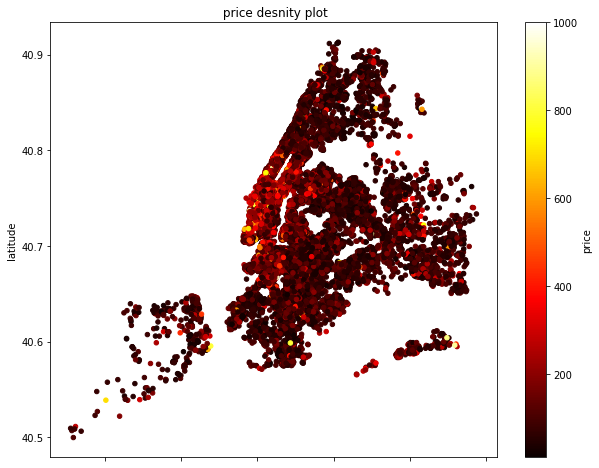

In [45]:
# plotting the price density plot
data = df[["latitude","longitude","price"]]
data=data[data['price']<=1000]
data.plot(kind = "scatter", x = "longitude", y = "latitude",figsize = (10,8),
c = "price", cmap = plt.get_cmap("hot"),colorbar = True).set_title(' price desnity plot')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price density plot')

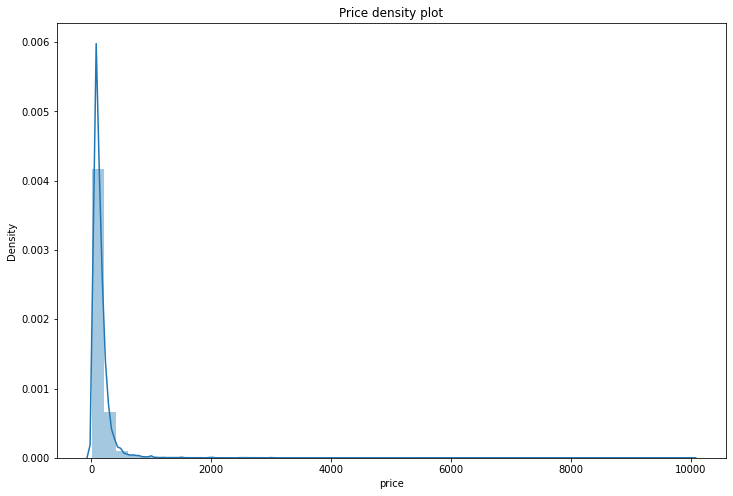

In [46]:
sns.distplot(df.price).set_title('Price density plot')


**These graphs makes it quite evident that density depends on the price rating. Density rises when the price is Minimum.**

#***Conclusion***


**1.Manhattan and Brooklyn are the most profitable location of Airbnb of New York City in compare to Staten Island, Queens and Bronx, if they increase the facilities and number of hosts in Manhattan and Brooklyn then possibly it would generate more revenue.**

2.**more than 80% hosts are in from Manhattan and Brooklyn.**

3.**Most of the customers prefer rooms with reasonable price.**

4.**Customers prefer to stay in Entire/apt or private rooms as compare to shared rooms so Airbnb should focus to make more available entire apartment and private rooms.**

5.**Sonder (NYC) is the most successful host with listings of 327.**

6.**Density of hotels are pretty much high in Manhattan and its nearby area.**

7.**Airbnb should publicity more about the famous location/sites of Bronx, Queens and Staten Island to attract the tourists and it will help them to earn more revenue from these regions as well.**